Feature Importance with Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [3]:
import pandas as pd
import csv
df_clean = pd.read_csv("cleaned_scaled.csv")
X = df_clean.drop("target", axis=1).values
y = df_clean["target"].values

In [4]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [5]:
import matplotlib.pyplot as plt

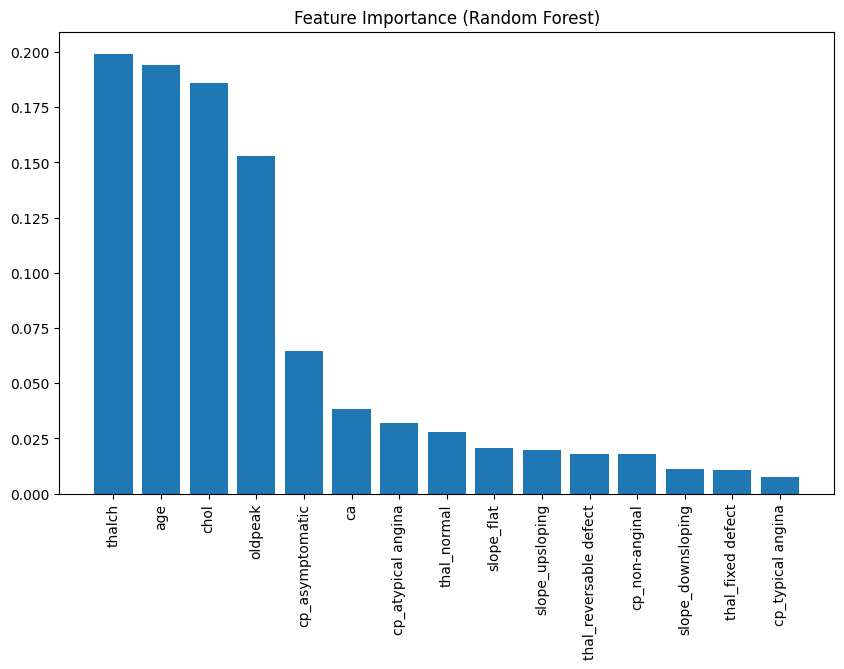

In [6]:
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), df_clean.drop("target", axis=1).columns[indices], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()

RFE

In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X, y)
print("Selected Features:", df_clean.drop("target", axis=1).columns[rfe.support_].tolist())

Selected Features: ['age', 'oldpeak', 'cp_asymptomatic', 'cp_atypical angina', 'thal_normal']


Chi-Square Test

In [14]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [13]:
df_clean = pd.read_csv("cleaned_scaled.csv")
X = df_clean.drop("target", axis=1)
y = df_clean["target"]

In [15]:
scaler = MinMaxScaler()
X_minmax = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [16]:
chi2_selector = SelectKBest(score_func=chi2, k=5)
chi2_selector.fit(X_minmax, y)
chi2_features = X.columns[chi2_selector.get_support()]
print("Chi-Square Selected Features:", chi2_features.tolist())

Chi-Square Selected Features: ['ca', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'thal_reversable defect']
